决策树拟合一个圆

观察树的深度对拟合的影响

深度越大，拟合的越好，计算代价大。

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [31]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
# get y with the shape of (100, 2)
y = np.array([
    np.pi * np.sin(X).ravel(),
    np.pi * np.cos(X).ravel(),
]).T

# add noises
y[::5, :] += 0.5 - rng.rand(20, 2)

In [32]:
# Fit regression model
md1, md2, md3 = 8, 12, 2
regr_1 = DecisionTreeRegressor(max_depth=md1)
regr_2 = DecisionTreeRegressor(max_depth=md2)
regr_3 = DecisionTreeRegressor(max_depth=md3)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [33]:
# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[..., np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
X_test.shape, y_1.shape

((20000, 1), (20000, 2))

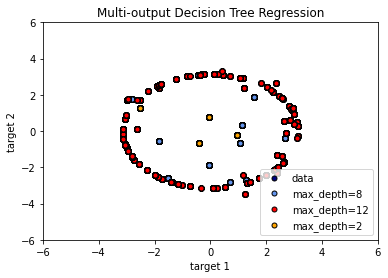

In [34]:
# Plot the results
plt.figure()
s = 25 # set the size
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label=f"max_depth={md1}",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label=f"max_depth={md2}")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label=f"max_depth={md3}"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()